In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:

# Makes the only dates in the data frame during ski season
def make_dataframe_calender(data):
    data["FormattedDate"] = pd.to_datetime(data["FormattedDate"])
    data["WhatMonth"] = data["FormattedDate"].dt.month
    months = [11, 12, 1, 2, 3, 4, 5]
    data = data[data["WhatMonth"].isin(months)]
    return data

# Makes my data only weekend days
def to_weekend(data):
    data = data[data['FormattedDate'].dt.dayofweek >= 5]
    return data

# Generates the snow data that I will compare the traffic data with
def graphSnow_x(x=7):
    file = "GRANBY.csv"
    new_file = pd.read_csv(file)
    data = pd.DataFrame(new_file)
    file = "FRISCO.csv"
    new_file = pd.read_csv(file)
    other_data = pd.DataFrame(new_file)
    data = pd.concat([data, other_data])
    data['DATE'] = pd.to_datetime(data['DATE'])
    data['DOY'] = data['DATE'].dt.dayofyear
    data['YEAR'] = data['DATE'].dt.year
    data['PRCP'] = pd.to_numeric(data['PRCP'], errors='coerce')
    data['SNOW'] = pd.to_numeric(data['SNOW'], errors='coerce')
    data.dropna(subset=['SNOW'], inplace=True)
    data['SNOW_DAY_SUM'] = data['SNOW'].rolling(window=x).sum()
    return data

# Gets the data from 2014-2024 for the given type of data to extract from
# I didn't use 2020 because covid skewed my data so much it changed my answers
def weekdays_total_graph(type="AF"):
    ret_data = pd.DataFrame()
    if(type == "AF"):
        for j in range(2014, 2025):
            if j != 2020:
                base_data = AF_data(j)
                base_data = base_data[base_data["COUNTDIR"] == 'S']
                base_data.reset_index(drop=True, inplace=True)
                base_data = std_df(base_data)
                base_data = mean_df(base_data)
                base_data['FormattedDate'] = pd.to_datetime(base_data['FormattedDate'])
                base_data['DOY'] = base_data['FormattedDate'].dt.dayofyear
                base_data['YEAR'] = base_data['FormattedDate'].dt.year
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([datetime.now().month])]
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([11,12,1,2,3,4,5])]
                ret_data = pd.concat([ret_data, base_data])
    elif(type == "ET"):
        for j in range(2014, 2025):
            if j != 2020:
                base_data = ET_data(j)
                base_data = base_data[base_data["COUNTDIR"] == 'S']
                base_data.reset_index(drop=True, inplace=True)
                base_data = std_df(base_data)
                base_data = mean_df(base_data)
                base_data['FormattedDate'] = pd.to_datetime(base_data['FormattedDate'])
                base_data['DOY'] = base_data['FormattedDate'].dt.dayofyear
                base_data['YEAR'] = base_data['FormattedDate'].dt.year
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([datetime.now().month])]
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([11,12,1,2,3,4,5])]
                ret_data = pd.concat([ret_data, base_data])
    elif(type == "BP"):
        for j in range(2014, 2025):
            if j != 2020:
                base_data = BP_data(j)
                base_data = base_data[base_data["COUNTDIR"] == 'S']
                base_data.reset_index(drop=True, inplace=True)
                base_data = std_df(base_data)
                base_data = mean_df(base_data)
                base_data['FormattedDate'] = pd.to_datetime(base_data['FormattedDate'])
                base_data['DOY'] = base_data['FormattedDate'].dt.dayofyear
                base_data['YEAR'] = base_data['FormattedDate'].dt.year
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([datetime.now().month])]
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([11,12,1,2,3,4,5])]
                ret_data = pd.concat([ret_data, base_data])
    return ret_data



# Gets the after-floyd data set
def AF_data(inp):
    inp = str(inp)
    Csv_Import = "AFTERFLOYD_TD\\" + inp + ".csv"
    csv_read = pd.read_csv(Csv_Import)
    return csv_read

# Gets the Berthoud-Pass data set
def BP_data(inp):
    inp = str(inp)
    Csv_Import = "BERTHODPASS_TD\\"+ inp + ".csv"
    csv_read = pd.read_csv(Csv_Import)
    csv_output = pd.DataFrame(csv_read)
    return csv_output

# Gets the Eisenhower-Tunnel data set
def ET_data(inp):
    inp = str(inp)
    Csv_Import = "EISENHOWERTUNNEL_TD\\"+ inp + ".csv"
    csv_read = pd.read_csv(Csv_Import)
    csv_output = pd.DataFrame(csv_read)
    return csv_output

# Drops unused data
def remove_counts(data):
    return data.drop(["COUNTSTATIONID","COUNTDATE","COUNTDIR","FormattedDate"], axis=1)

# Adds a collumn called mean, that is the average of the hours
def mean_df(data):
    data['Mean'] = data.loc[:, 'HOUR0':'HOUR23'].mean(axis=1)
    return data

# Adds a collumn called Std, that is the Std of the hours
def std_df(data):
    data['Std'] = data.loc[:, 'HOUR0':'HOUR23'].std(axis=1)
    return data

# Makes a dataframe that I can use consistently 
def make_total_data(hour=7, t="AF",mean=False, window=7,weekend=True):
    if(not mean):
        hour = f"HOUR{hour}"
        traffic_data = weekdays_total_graph(type=t)
        snow_data = graphSnow_x(window)
        snow_data.rename(columns={'DOY': 'Snow_DOY', 'YEAR': 'Snow_YEAR'}, inplace=True)
        merged_data = pd.merge(traffic_data, snow_data, left_on=['DOY', 'YEAR'], right_on=['Snow_DOY', 'Snow_YEAR'], how='inner')
        if(weekend):
            merged_data = to_weekend(merged_data)        
        new_data = merged_data.loc[:, [hour,'SNOW_DAY_SUM', 'Snow_DOY']]
        new_data.dropna(subset=['SNOW_DAY_SUM'], inplace=True)
    else:
        traffic_data = weekdays_total_graph(type=t)
        snow_data = graphSnow_x(window)
        snow_data.rename(columns={'DOY': 'Snow_DOY', 'YEAR': 'Snow_YEAR'}, inplace=True)
        merged_data = pd.merge(traffic_data, snow_data, left_on=['DOY', 'YEAR'], right_on=['Snow_DOY', 'Snow_YEAR'], how='inner')
        if(weekend):
            merged_data = to_weekend(merged_data)
        new_data = merged_data.loc[:, ["Mean",'SNOW_DAY_SUM', 'Snow_DOY']]
        new_data.dropna(subset=['SNOW_DAY_SUM'], inplace=True)
    
    return new_data

In [3]:
data_BP = make_total_data(t="BP")
data_ET = make_total_data(t="ET")
data_AF = make_total_data(t="AF")

In [4]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn_som.som import SOM

In [5]:

agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg.fit(data_AF[["HOUR7", 'SNOW_DAY_SUM']])
labels_af = agg.labels_

agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg.fit(data_ET[['HOUR7', 'SNOW_DAY_SUM']])
labels_et = agg.labels_

agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg.fit(data_BP[['HOUR7', 'SNOW_DAY_SUM']])
labels_bp = agg.labels_

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 2 is required by AgglomerativeClustering.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_AF[["HOUR7", 'SNOW_DAY_SUM']])
labels_af = kmeans.labels_

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_ET[['HOUR7', 'SNOW_DAY_SUM']])
labels_et = kmeans.labels_

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_BP[['HOUR7', 'SNOW_DAY_SUM']])
labels_bp = kmeans.labels_

C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

### DBScan

In [ ]:
dbscan = DBSCAN(eps=25,min_samples = 4)
dbscan.fit(data_AF[["HOUR7", 'SNOW_DAY_SUM']])
labels_af = dbscan.labels_

dbscan = DBSCAN(eps=25,min_samples = 4)
dbscan.fit(data_ET[['HOUR7', 'SNOW_DAY_SUM']])
labels_et = dbscan.labels_

dbscan = DBSCAN(eps=25,min_samples = 4)
dbscan.fit(data_BP[['HOUR7', 'SNOW_DAY_SUM']])
labels_bp = dbscan.labels_  


### Self Organizing map

In [ ]:
som_data_AF = data_AF[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_AF)
predictions_af = som_data.predict(som_data_AF)

som_data_ET = data_ET[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_ET)
predictions_et = som_data.predict(som_data_ET)


som_data_BP = data_BP[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_BP)
predictions_bp = som_data.predict(som_data_BP)

In [ ]:
import umap.umap_ as umap
from sklearn.discriminant_analysis import StandardScaler

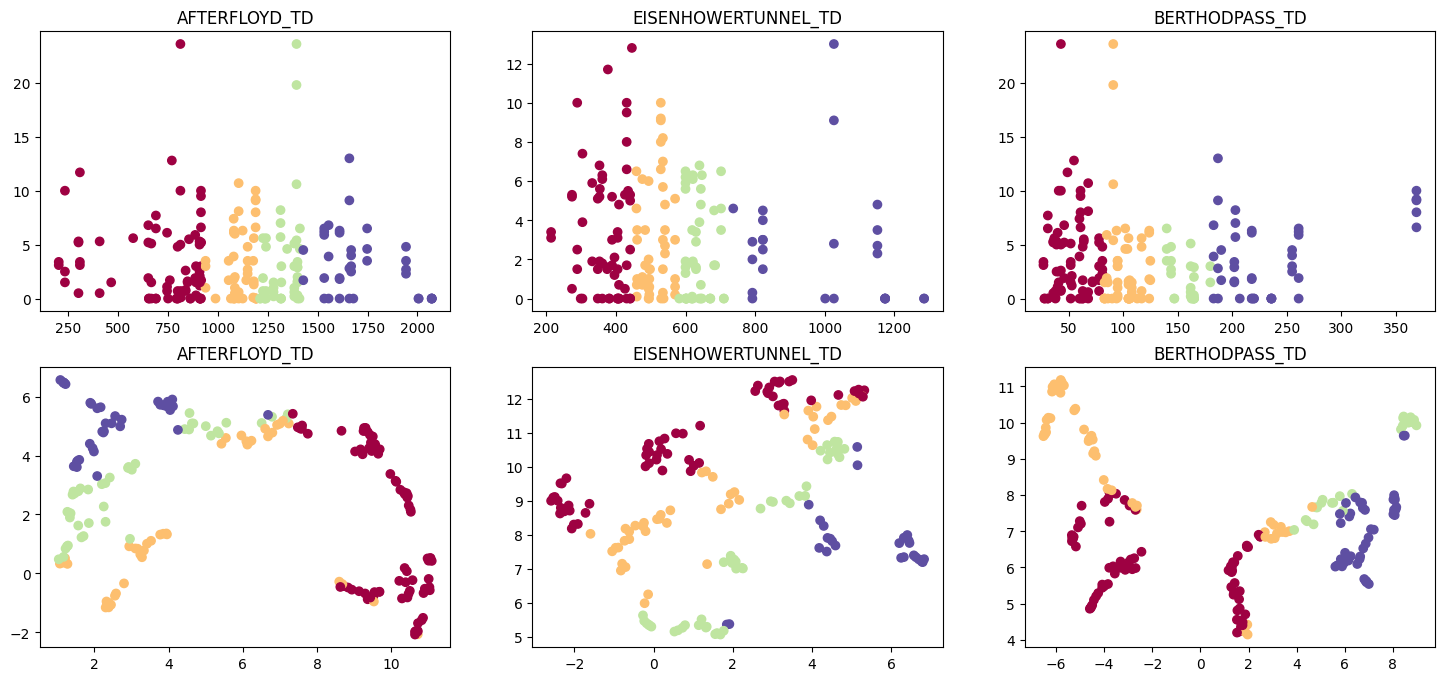

In [ ]:
som_data_AF = data_AF[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_AF)
predictions_af = som_data.predict(som_data_AF)

reducer = umap.UMAP()
umap_data = som_data_AF
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_af = reducer.fit_transform(scaled_umap_data)



som_data_ET = data_ET[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_ET)
predictions_et = som_data.predict(som_data_ET)

reducer = umap.UMAP()
umap_data = som_data_ET
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_et = reducer.fit_transform(scaled_umap_data)




som_data_BP = data_BP[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_BP)
predictions_bp = som_data.predict(som_data_BP)

reducer = umap.UMAP()
umap_data = som_data_BP
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)


fig, ax = plt.subplots(2,3, figsize=(18,8))

ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=predictions_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=predictions_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=predictions_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=predictions_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=predictions_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=predictions_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()


Although this looks nice, umap does a lot better when we expand our number of clusters, so lets try 8 clusters

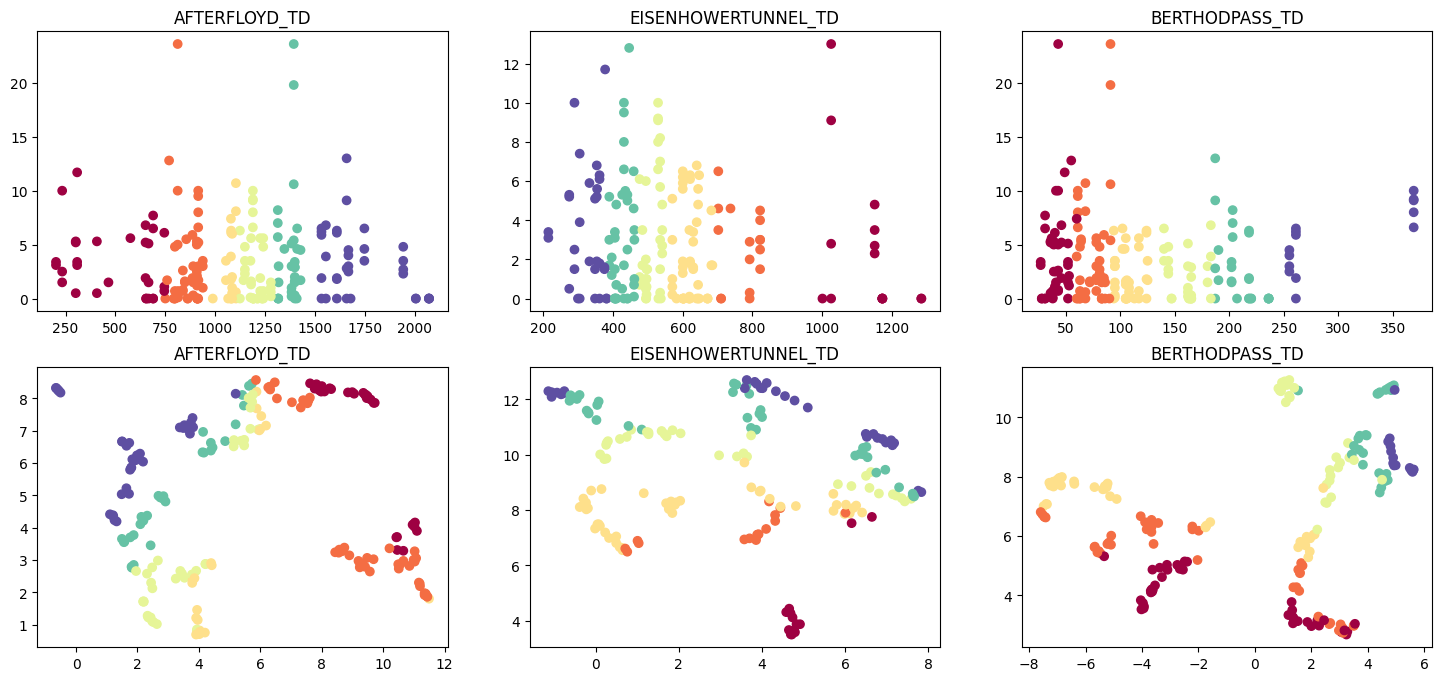

In [ ]:
som_data_AF = data_AF[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(som_data_AF)
labels_af = som_data.predict(som_data_AF)

reducer = umap.UMAP()
umap_data = som_data_AF
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_af = reducer.fit_transform(scaled_umap_data)

som_data_ET = data_ET[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(som_data_ET)
labels_et = som_data.predict(som_data_ET)

reducer = umap.UMAP()
umap_data = som_data_ET
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_et = reducer.fit_transform(scaled_umap_data)




som_data_BP = data_BP[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(som_data_BP)
labels_bp = som_data.predict(som_data_BP)

reducer = umap.UMAP()
umap_data = som_data_BP
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)


fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()


As we can see above, we can now visualize where our data is coming from for our umap function. Why this is important is because umap doesn't have any specific x and y values we can set to find what data point we are analyzing. Thanks to the sorting algorithm we can easily find where our data is coming from. Allowing for me to realize that all the work I did with clustering the clusters don't show the trends of the graph great as many of the clusters are all over the place.

After reading the graphs I figured I would attempt to use the scanning methods to re-cluster our data this time, but now with the umap transformation.

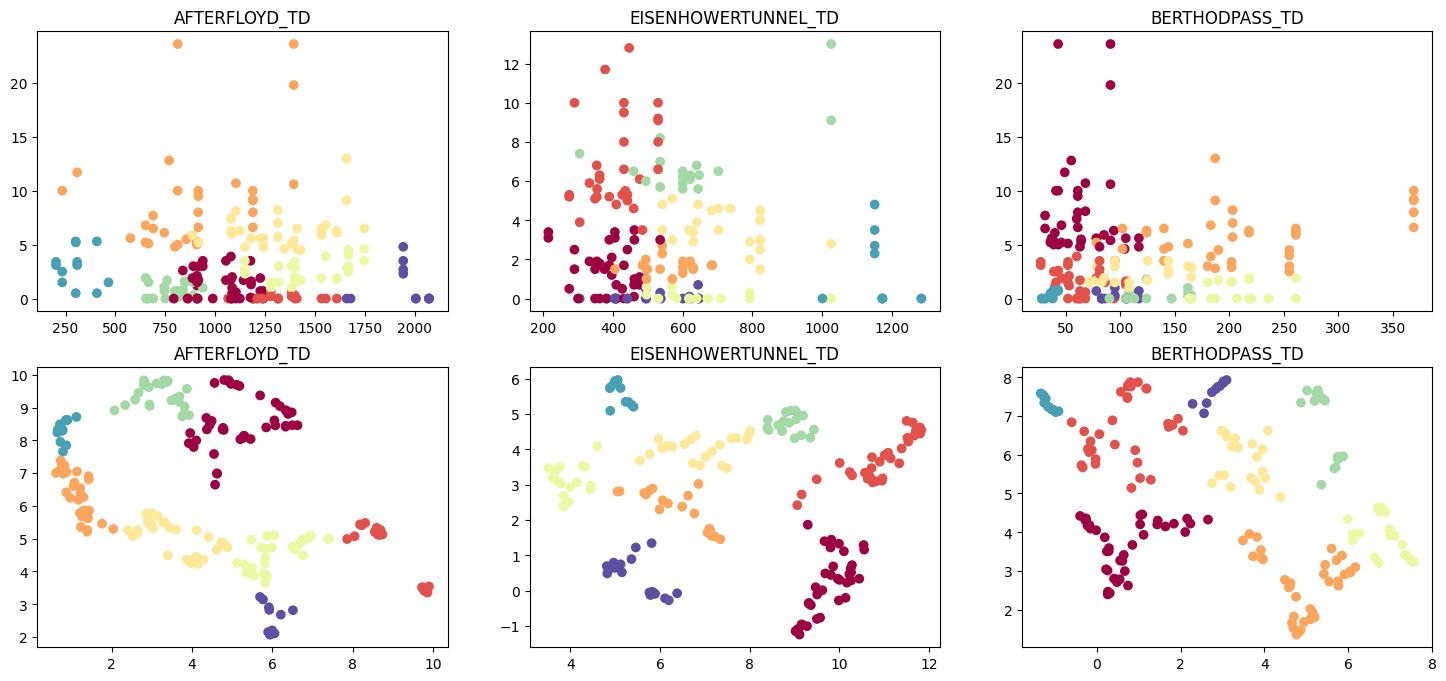

In [ ]:
agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_et)
labels_et = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_bp)
labels_bp = agg.labels_

fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

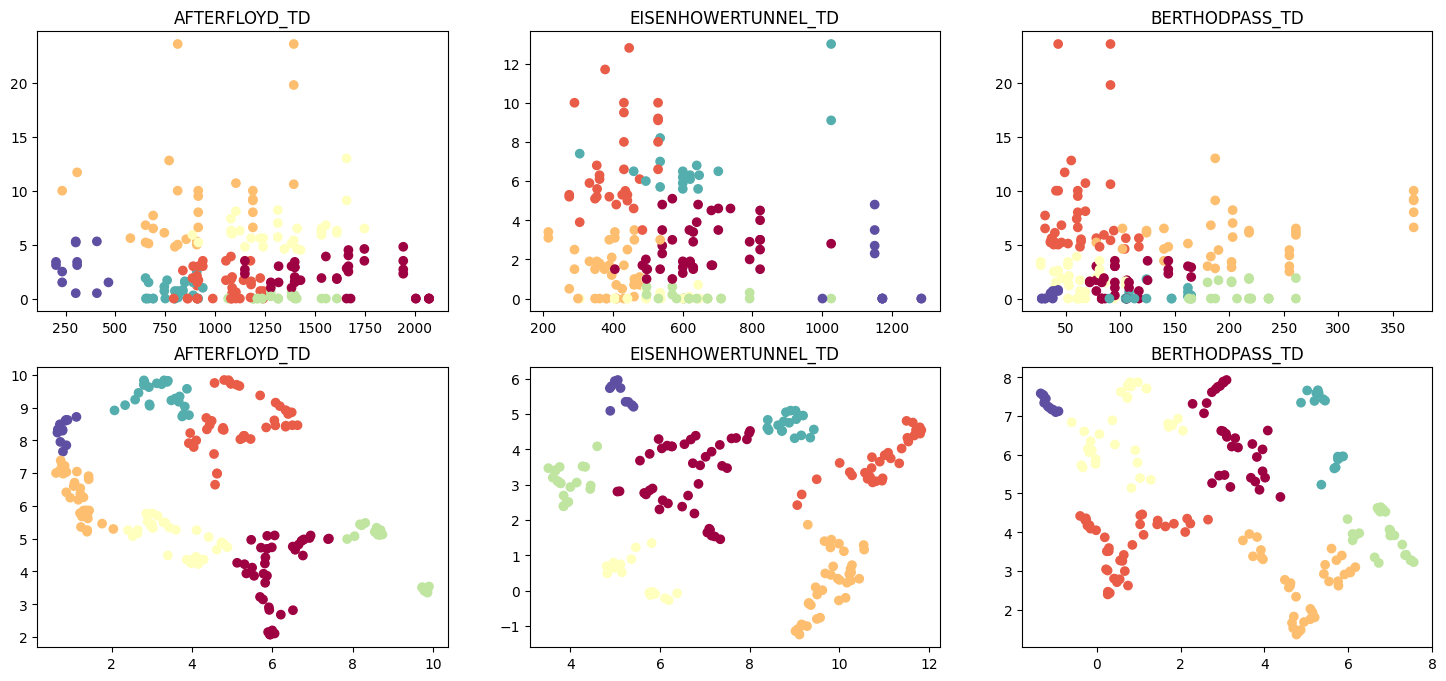

In [ ]:
agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af = agg.labels_

agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agg.fit(embedded_data_et)
labels_et = agg.labels_

agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agg.fit(embedded_data_bp)
labels_bp = agg.labels_

fig, ax = plt.subplots(2,3, figsize=(18,8))


scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

In [ ]:
hour8_af = make_total_data(t="AF", hour=8)
hour8_et = make_total_data(t="ET", hour=8)
hour8_bp = make_total_data(t="BP", hour=8)

In [ ]:
reducer = umap.UMAP(n_neighbors=25)
hour8_af = hour8_af[["HOUR8", 'SNOW_DAY_SUM']].values
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(hour8_af)
embedded_data_af = reducer.fit_transform(scaled_umap_data)

reducer = umap.UMAP(n_neighbors=25)
hour8_et = hour8_et[["HOUR8", 'SNOW_DAY_SUM']].values
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(hour8_et)
embedded_data_et = reducer.fit_transform(scaled_umap_data)

reducer = umap.UMAP(n_neighbors=25)
hour8_bp = hour8_bp[["HOUR8", 'SNOW_DAY_SUM']].values
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(hour8_bp)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)

In [ ]:
agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af_new = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_et)
labels_et_new = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_bp)
labels_bp_new = agg.labels_

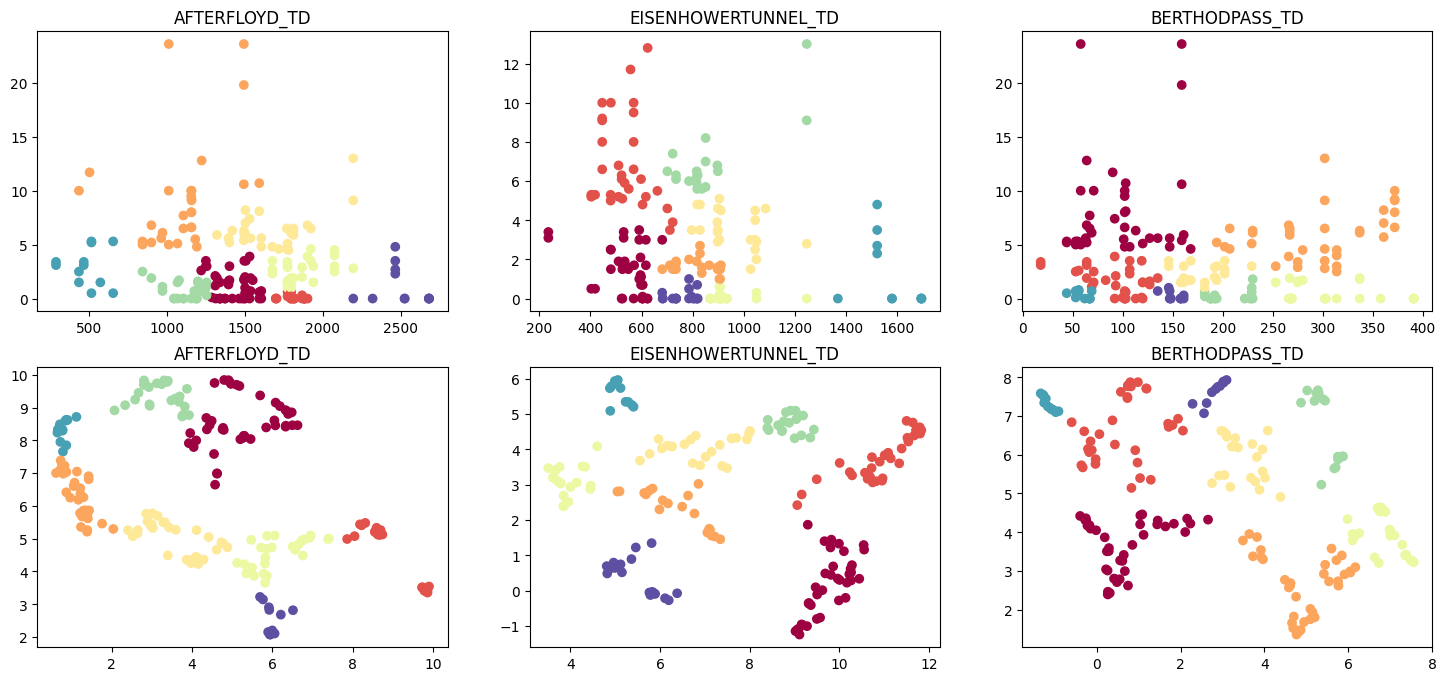

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(hour8_af[:,0], hour8_af[:, 1], c=labels_af_new, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(hour8_et[:,0], hour8_et[:, 1], c=labels_et_new, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(hour8_bp[:,0], hour8_bp[:, 1], c=labels_bp_new, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af_new, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et_new, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp_new, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

In [ ]:
data_af = hour8_af[:, [0, 1]]
data_et = hour8_et[:, [0, 1]]
data_bp = hour8_bp[:, [0, 1]]

In [ ]:
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(data_af)
labels_af = som_data.predict(data_af)

som_data = SOM(m=6, n=1, dim=2)
som_data.fit(data_et)
labels_et = som_data.predict(data_et)

som_data = SOM(m=6, n=1, dim=2)
som_data.fit(hour8_bp)
labels_bp = som_data.predict(hour8_bp)


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
PCA_data_af = pca.fit_transform(data_af)

pca = PCA(n_components=2)
PCA_data_et = pca.fit_transform(data_et)

pca = PCA(n_components=2)
PCA_data_bp = pca.fit_transform(data_bp)


In [ ]:
from sklearn.manifold import TSNE

data_af = hour8_af[:, [0, 1]]
data_et = hour8_et[:, [0, 1]]
data_bp = hour8_bp[:, [0, 1]]

tsne = TSNE(n_components=2, random_state=42)
transformed_data_af = tsne.fit_transform(data_af)

tsne = TSNE(n_components=2, random_state=42)
transformed_data_et = tsne.fit_transform(data_et)

tsne = TSNE(n_components=2, random_state=42)
transformed_data_bp = tsne.fit_transform(data_bp)

len(data_et)


177

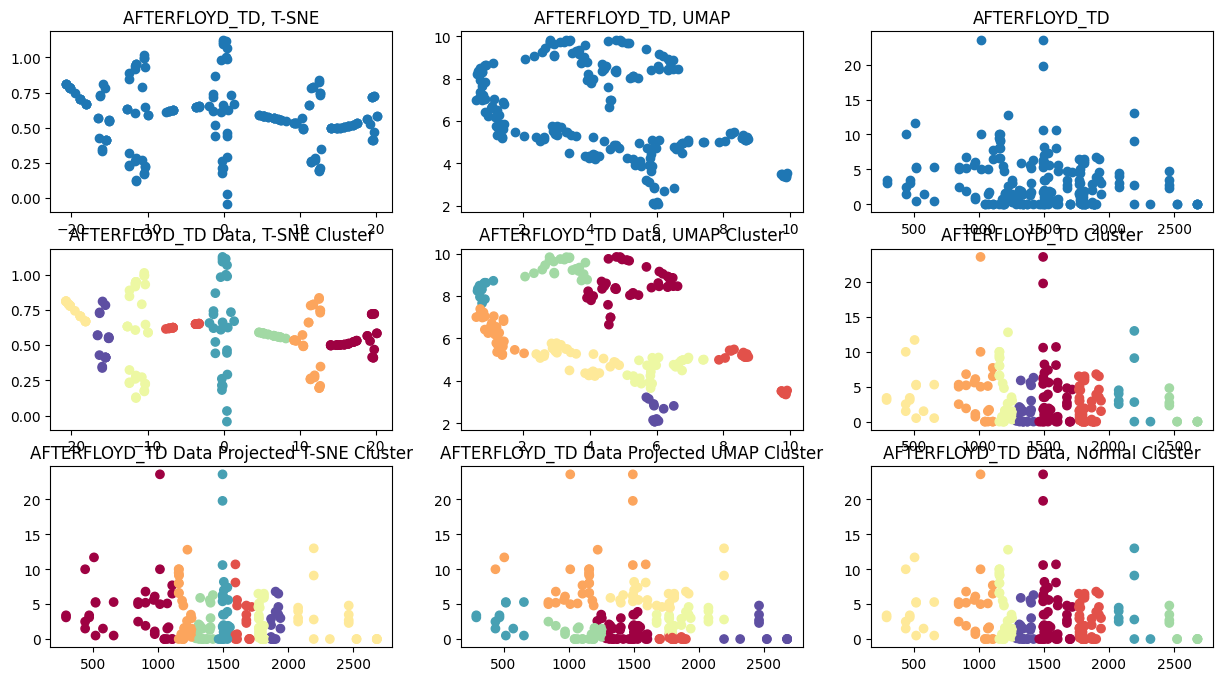

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,8))



scatter = ax[0,0].scatter(transformed_data_af[:,0], transformed_data_af[:, 1])
ax[0,0].set_title("AFTERFLOYD_TD, T-SNE")

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(transformed_data_af)
labels_af_tsne = agg.labels_

scatter = ax[1,0].scatter(transformed_data_af[:,0], transformed_data_af[:, 1], c=labels_af_tsne, cmap='Spectral')
ax[1,0].set_title("AFTERFLOYD_TD Data, T-SNE Cluster")

scatter = ax[2,0].scatter(data_af[:,0], data_af[:, 1], c=labels_af_tsne, cmap='Spectral')
ax[2,0].set_title("AFTERFLOYD_TD Data Projected T-SNE Cluster")






scatter = ax[0,1].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1])
ax[0,1].set_title("AFTERFLOYD_TD, UMAP")

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af_umap = agg.labels_

scatter = ax[1,1].scatter(embedded_data_af[:,0], embedded_data_af[:, 1], c=labels_af_umap, cmap='Spectral')
ax[1,1].set_title("AFTERFLOYD_TD Data, UMAP Cluster")

scatter = ax[2,1].scatter(data_af[:,0], data_af[:, 1], c=labels_af_umap, cmap='Spectral')
ax[2,1].set_title("AFTERFLOYD_TD Data Projected UMAP Cluster")






scatter = ax[0,2].scatter(data_af[:, 0], data_af[:, 1])
ax[0,2].set_title("AFTERFLOYD_TD")

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(data_af)
labels_af_norm = agg.labels_

scatter = ax[1,2].scatter(data_af[:,0], data_af[:, 1], c=labels_af_norm, cmap='Spectral')
ax[1,2].set_title("AFTERFLOYD_TD Cluster")

scatter = ax[2,2].scatter(data_af[:,0], data_af[:, 1], c=labels_af_norm, cmap='Spectral')
ax[2,2].set_title("AFTERFLOYD_TD Data, Normal Cluster")




plt.show()

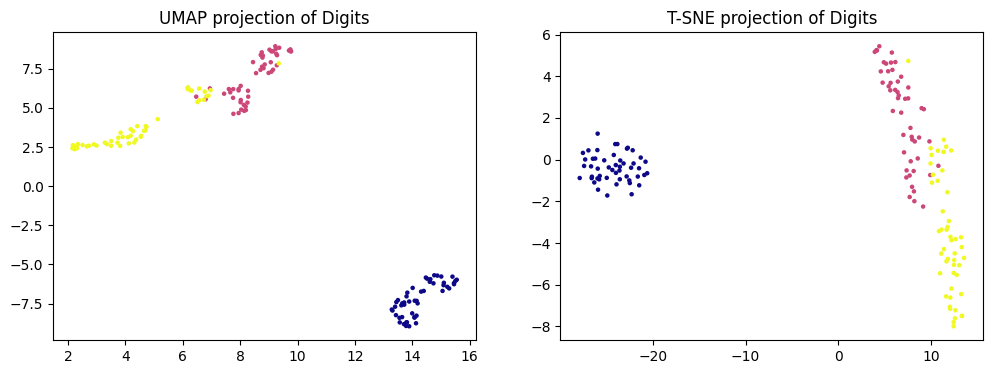

In [ ]:
from sklearn.datasets import load_iris

digits = load_iris()
data = digits.data
target = digits.target

u = umap.UMAP()
umap_embedding = u.fit_transform(data)

t = TSNE(n_components=2, random_state=42)
tsne_embedding = t.fit_transform(data)

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=target, cmap='plasma', s=5)
ax[0].set_title('UMAP projection of Digits')


ax[1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=target, cmap='plasma', s=5)
ax[1].set_title('T-SNE projection of Digits')

plt.show()


# UMAP implementation

In [ ]:

import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.linalg import eigsh

def approx_nearest_neighbors(X, x, n_neighbors):
    knn = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    distances, indices = knn.kneighbors(X)
    return indices[0], distances[0]

def smooth_knn_dist(knn_dists, n_neighbors, tol=1e-5, max_iter=100):
    target = np.log2(n_neighbors)
    low, high = 0, max(knn_dists)
    for _ in range(max_iter):
        rho = (low + high) / 2
        sum_exp = np.sum(np.exp(-(knn_dists - rho)))
        if np.abs(sum_exp - target) < tol:
            break
        elif sum_exp > target:
            high = rho
        else:
            low = rho

    return rho

def local_fuzzy_simplicial_set(X, x, n_neighbors):
    knn_indices, knn_dists = approx_nearest_neighbors(X, x, n_neighbors)
    knn_dists_smoothed = smooth_knn_dist(knn_dists, n_neighbors)
    
    fs_set = np.zeros(len(X))
    
    for y in range(len(X)):
        if y in knn_indices:
            dxy = knn_dists[knn_indices.tolist().index(y)]
            fs_set[y] = (dxy / knn_dists_smoothed)
    
    return fs_set

def spectral_embedding(top_rep, n_components):
    A = top_rep
    D = np.diag(np.sum(A, axis=1))
    D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    L = D_inv_sqrt @ (D - A) @ D_inv_sqrt
    print("L", L.shape)
    eigenvalues, eigenvectors = eigsh(L, k=n_components + 1, which='SM')
    Y = eigenvectors[:, 1:n_components + 1]
    return Y


def optimize_embedding(top_rep, Y, min_dist, n_epochs, learning_rate=1e-2, n_neg_samples=10):
    for epoch in range(n_epochs):
        print("Epoch", epoch)
        for (a, b), p in np.ndenumerate(top_rep):
            print(p)
            if np.random.rand() < p:
                ya = Y[a]
                yb = Y[b]
                distance = np.linalg.norm(ya - yb)
                if distance > min_dist:
                    ya += learning_rate * (np.log(p) * (ya - yb))
                    Y[a] = ya
                for _ in range(n_neg_samples):
                    c = np.random.randint(len(Y))
                    yc = Y[c]
                    distance_neg = np.linalg.norm(ya - yc)
                    if distance_neg > min_dist:
                        ya += learning_rate * (np.log(1 - p) * (ya - yc))
                        Y[a] = ya
    return Y



def UMAP(X, n_neighbors=10, n_components=2, min_dist=0.1, n_epochs=200):
    fs_set = {}
    for x_index in range(len(X)):
        fs_set[x_index] = local_fuzzy_simplicial_set(X, x_index, n_neighbors)
    
    top_rep = np.zeros((len(X), len(X)))
    
    for x_index in range(len(X)):
        value = fs_set[x_index]
        top_rep[x_index, :] = value
    
    # embedding = spectral_embedding(top_rep, n_components)
    # Y = optimize_embedding(top_rep, embedding, min_dist, n_epochs)
    # return Y

Y = UMAP(data_af, n_epochs=100)
print(Y)


None


In [ ]:
# Testing personal UMAP

data_af = hour8_af[:, [0, 1]]
data_et = hour8_et[:, [0, 1]]
data_bp = hour8_bp[:, [0, 1]]

print("Dataframe size", data_af.shape)

personal_umap(data_af, n=20)

# print("new_data size", new_data_af.shape)
# print(new_data_af)

# plt.figure(figsize=(12,12))

# plt.scatter(new_data_af[:,0], new_data_af[:, 1], c=labels_af, cmap="Spectral")
# plt.title("AFTERFLOYD_TD __ Personal UMAP")

Dataframe size (200, 2)


NameError: name 'personal_umap' is not defined